In [10]:
%matplotlib inline

from __future__ import print_function

import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm


# Fit guassian to 1332 peak
from scipy.optimize import curve_fit

# Energies from Eu152 used for calibration
energy_list = [121.8, 1408, 778.9, 1112, 334.3,]
channel_list = [296.9, 3500, 1933, 2763, 850.9]
channel_err = np.array([4.470, 6.085, 5.795, 6.306, 4.654])

weights = 1/np.power(channel_err, 2)

# put x and y into a pandas DataFrame, and the weights into a Series
ws = pd.DataFrame({
    'x': energy_list,
    'y': channel_list,
    'Energy (keV)': energy_list,
    'Channel': channel_list,
    'yerr': map(lambda x: x * 100, channel_err)
})

wls_fit = sm.wls('x ~ y', data=ws, weights=1 / weights).fit()

# show the fit summary by calling wls_fit.summary()

print(wls_fit.summary())

def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def calc_fwhm(sigma):
    return 2 * np.sqrt(2 * np.log(2)) * sigma

def calc_resolution(height, sigma):
    return calc_fwhm(sigma) / height

def energy_error(channel, slope_uncertainty = wls_fit.bse['y'], intercept_uncertainty = wls_fit.bse['Intercept']):
    slope_error = channel * slope_uncertainty
    error = math.sqrt((slope_error ** 2) + intercept_uncertainty **2)
    
    return error

def counting_error(num_counts, energy_range=1):
    return math.sqrt(num_counts) / energy_range

def resolution_error(height_at_centroid, resolution):
    return (math.sqrt(height_at_centroid)/height_at_centroid) * resolution


                            WLS Regression Results                            
Dep. Variable:                      x   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.438e+04
Date:                Mon, 18 Sep 2017   Prob (F-statistic):           1.35e-07
Time:                        19:12:45   Log-Likelihood:                -12.798
No. Observations:                   5   AIC:                             29.60
Df Residuals:                       3   BIC:                             28.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0333      3.865     -0.526      0.6

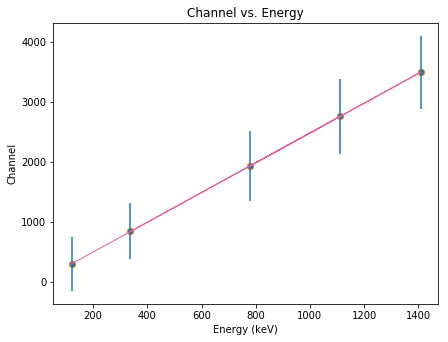

In [11]:
# let's plot our data
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='w')
ws.plot(
    kind='scatter',
    x='Energy (keV)',
    y='Channel',
    yerr='yerr',
    style='o',
    alpha=1.,
    ax=ax,
    title='Channel vs. Energy',
    edgecolor='#ff8300',
    s=40
)

# weighted prediction
wp, = ax.plot(
    wls_fit.predict(),
    ws['y'],
    color='#e55ea2',
    lw=1.,
    alpha=1.0,
)

plt.tight_layout()
fig.set_size_inches(6.40, 5.12)
plt.savefig("calibration.png", dpi=100, alpha=True)
plt.show()

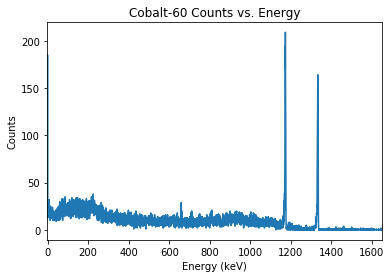

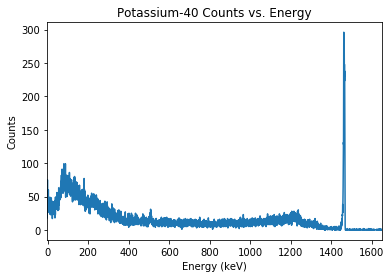

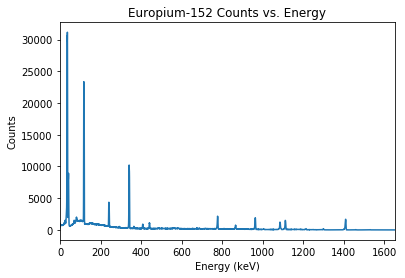

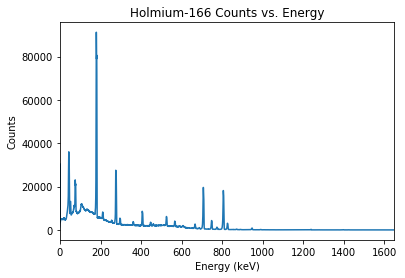

In [12]:
# Plot of Co60 counts vs Energy
plt.figure(1)
co60 = pd.read_csv("data/co60.csv", names=['Channel','Counts'], header=0)
co60['Energy (keV)'] = co60['Channel'].apply(lambda x: x*wls_fit.params['y'] + wls_fit.params['Intercept'])
co60.plot(x='Energy (keV)', y='Counts', legend=None)
plt.title("Cobalt-60 Counts vs. Energy")
plt.ylabel('Counts')
fig.set_size_inches(6.40, 5.12)
plt.savefig("Co60.png", dpi=200, alpha=True)
plt.show()

# Plot of K40 counts vs Energy
plt.figure(1)
k40 = pd.read_csv("data/k40.csv", names=['Channel','Counts'], header=0)
k40['Energy (keV)'] = k40['Channel'].apply(lambda x: x*wls_fit.params['y'] + wls_fit.params['Intercept'])
k40.plot(x='Energy (keV)', y='Counts', legend=None)
plt.title("Potassium-40 Counts vs. Energy")
plt.ylabel('Counts')
fig.set_size_inches(6.40, 5.12)
plt.savefig("K40.png", dpi=200, alpha=True)
plt.show()

# Plot of Eu152 counts vs Energy
plt.figure(1)
eu152 = pd.read_csv("data/eu152.csv", names=['Channel','Counts'], header=0)
eu152['Energy (keV)'] = eu152['Channel'].apply(lambda x: x*wls_fit.params['y'] + wls_fit.params['Intercept'])
eu152.plot(x='Energy (keV)', y='Counts', legend=None)
plt.title("Europium-152 Counts vs. Energy")
plt.ylabel('Counts')
fig.set_size_inches(6.40, 5.12)
plt.savefig("eu152.png", dpi=200, alpha=True)
plt.show()

# Plot of Ho166 counts vs Energy
plt.figure(1)
ho166 = pd.read_csv("data/ho166.csv", names=['Channel','Counts'], header=0)
ho166['Energy (keV)'] = ho166['Channel'].apply(lambda x: x*wls_fit.params['y'] + wls_fit.params['Intercept'])
ho166.plot(x='Energy (keV)', y='Counts', legend=None)
plt.title("Holmium-166 Counts vs. Energy")
plt.ylabel('Counts')
fig.set_size_inches(6.40, 5.12)
plt.savefig("ho166.png", dpi=200, alpha=True)
plt.show()

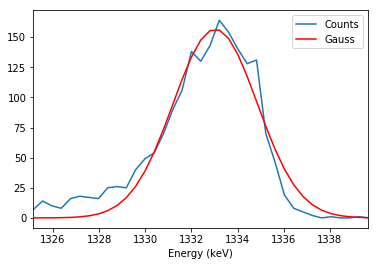

C60 1332 Fit
mean: 1333.03305361
sigma: -1.8234573875
Peak-to-Compton: 20.3045972441
Resolution: -0.0274207278389
Resolution Error: -0.00219124932849


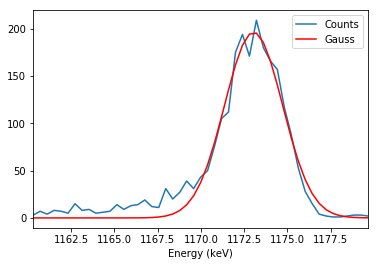

C60 1173 Fit
mean: 1173.04390744
sigma: -1.6794112608
Resolution: -0.0201424119269
Resolution Error: -0.00143750650152
Peak/Compton 2.25627125247


In [18]:
# Get Compton range average for Co
co60_compton = co60.loc[(co60['Energy (keV)'] >= 1040) & (co60['Energy (keV)'] <=1096), ['Energy (keV)', 'Counts', 'Channel']]
compton_counts_mean = co60_compton.mean()['Counts']
#co60_compton

mean = 1332
std = 2


# Fit guassian to 1332 peak
co60_peak = co60.loc[(co60['Energy (keV)'] >= 1325) & (co60['Energy (keV)'] <=1340), ['Energy (keV)', 'Counts']]
popt1332, pcov = curve_fit(gauss_function, co60_peak['Energy (keV)'], co60_peak['Counts'], p0 = [1, mean, std])

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='w')
co60_peak.plot(x='Energy (keV)', y='Counts', ax=ax)
co60_peak['Gauss'] = co60_peak['Energy (keV)'].apply(lambda x: gauss_function(x, popt1332[0], popt1332[1], popt1332[2]))
co60_peak.plot(x='Energy (keV)', y='Gauss', ax=ax, color='red')
plt.show()

co60_1332_counts = gauss_function(popt1332[1], popt1332[0], popt1332[1], popt1332[2])
peak_to_compton = co60_1332_counts / compton_counts_mean
print("C60 1332 Fit")
print("mean:", popt1332[1])
print("sigma:", popt1332[2])
print("Peak-to-Compton:", peak_to_compton)
res_1332 = calc_resolution(co60_1332_counts, popt1332[2])
print("Resolution:", res_1332)
print("Resolution Error:", resolution_error(co60_1332_counts, res_1332))

# Fit guassian to 1173 peak
mean = 1173
std = 5
co60_low_peak = co60.loc[(co60['Energy (keV)'] >= 1160) & (co60['Energy (keV)'] <=1180), ['Energy (keV)', 'Counts']]
popt1173, pcov = curve_fit(gauss_function, co60_low_peak['Energy (keV)'], co60_low_peak['Counts'], p0 = [1, mean, std])

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='w')
co60_low_peak.plot(x='Energy (keV)', y='Counts', ax=ax)
co60_low_peak['Gauss'] = co60_low_peak['Energy (keV)'].apply(lambda x: gauss_function(x, popt1173[0], popt1173[1], popt1173[2]))
co60_low_peak.plot(x='Energy (keV)', y='Gauss', ax=ax, color='red')
plt.show()

print("C60 1173 Fit")
print("mean:", popt1173[1])
print("sigma:", popt1173[2])
co60_1173_counts = gauss_function(popt1173[1], popt1173[0], popt1173[1], popt1173[2])
res_1173 = calc_resolution(co60_1173_counts, popt1173[2])
print("Resolution:", res_1173)
print("Resolution Error:", resolution_error(co60_1173_counts, res_1173))


##
# Peak/compton error
##

compton_counts = co60_compton.Counts.sum()
compton_error = counting_error(compton_counts, energy_range = (co60_compton['Energy (keV)'].max() - co60_compton['Energy (keV)'].min()))

peak_fit_error = abs(popt1332[2])
peak_count_error = counting_error(popt1332[0])
peak_error = math.sqrt((peak_fit_error ** 2) + (peak_count_error ** 2))

peak_to_compton_error = peak_to_compton * math.sqrt( ((peak_error / popt1332[0]) ** 2) + ((compton_error / compton_counts_mean) ** 2) )
print("Peak/Compton", peak_to_compton_error)


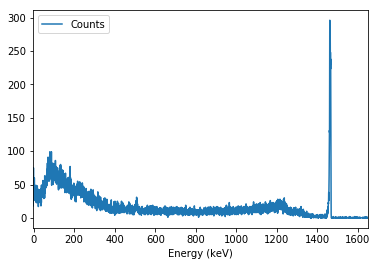

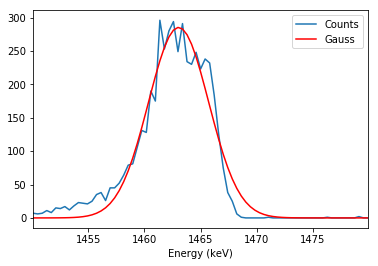

K40 Fit
mean: 1463.0419593
sigma: 2.68492328533
Resolution: 0.0221605748244
Resolution Error: 0.00131197853406
Peak/Background 29.5101611244


In [14]:
'''K40 resolution'''
plt.figure(1)
k40 = pd.read_csv("data/k40.csv", names=['Channel','Counts'], header=0)
k40['Energy (keV)'] = k40['Channel'].apply(lambda x: x*wls_fit.params['y'] + wls_fit.params['Intercept'])
k40.plot(x='Energy (keV)', y='Counts')
plt.show()

# Fit guassian to  peak
mean = 1450
std = 5
k40_peak = k40.loc[(k40['Energy (keV)'] >= 1450) & (k40['Energy (keV)'] <=1480), ['Energy (keV)', 'Counts']]
popt, pcov = curve_fit(gauss_function, k40_peak['Energy (keV)'], k40_peak['Counts'], p0 = [1, mean, std])

k40_background = k40.loc[(k40['Energy (keV)'] >= 600) & (k40['Energy (keV)'] <=800), ['Energy (keV)', 'Counts', 'Channel']]
background_mean = k40_background.mean()['Counts']

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='w')
k40_peak.plot(x='Energy (keV)', y='Counts', ax=ax)
k40_peak['Gauss'] = k40_peak['Energy (keV)'].apply(lambda x: gauss_function(x, popt[0], popt[1], popt[2]))
k40_peak.plot(x='Energy (keV)', y='Gauss', ax=ax, color='red')
plt.show()

print("K40 Fit")
print("mean:", popt[1])
print("sigma:", popt[2])
height_at_centroid = gauss_function(popt[1], popt[0], popt[1], popt[2])
resolution = calc_resolution(height_at_centroid, popt[2])
print("Resolution:", resolution)
print("Resolution Error:", resolution_error(height_at_centroid, resolution))
print("Peak/Background", height_at_centroid/background_mean)



In [15]:
co60_compton_error = map(energy_error, co60_compton.Channel)
avg_co60_compton_error = np.mean(co60_compton_error)
print(avg_co60_compton_error)

5.72075894557


In [16]:
#wls_fit.params['Intercept']
print(wls_fit.bse['Intercept']) # standard error on wls
print(wls_fit.bse['y']) # standard error on wls

3.8651685521
0.00158844052871


In [17]:
##
# Peak/compton error
##